In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wfd_dec_min = -63
wfd_dec_max = 4.5

In [3]:
kpno_lat = 32
mk_lat = 20

In [4]:
def min_airmass(field_dec, obs_lat):
    min_z = np.radians(np.abs(field_dec - obs_lat))
    min_airmass = 1 / np.cos(min_z)
    return min_airmass

In [5]:
def dec_range(obs_lat, airmass_limit):
    z_max = np.degrees(np.arccos(1.0/airmass_limit))
    dec_min = obs_lat - z_max
    dec_max = obs_lat + z_max
    dec_min = np.max([dec_min, -90])
    dec_max = np.min([dec_max, 90])
    return dec_min, dec_max

In [6]:
def overlap_wfd(obs_lat, airmass_limit, wfd_dec_min, wfd_dec_max):
    dec_min, dec_max = dec_range(obs_lat, airmass_limit)
    if dec_min > wfd_dec_max:
        return 0
    if dec_max < wfd_dec_min: 
        return 0
    overlap_dec_max = np.min([dec_max, wfd_dec_max])
    overlap_dec_min = np.max([dec_min, wfd_dec_min])
    overlap_area = 2*np.pi*np.abs(np.sin(np.radians(overlap_dec_min)) - np.sin(np.radians(overlap_dec_max)))
    wfd_area = 2*np.pi*np.abs(np.sin(np.radians(wfd_dec_min)) - np.sin(np.radians(wfd_dec_max)))
    return overlap_area/wfd_area

In [7]:
overlap_wfd(kpno_lat, 2, wfd_dec_min, wfd_dec_max)

0.56518833392058943

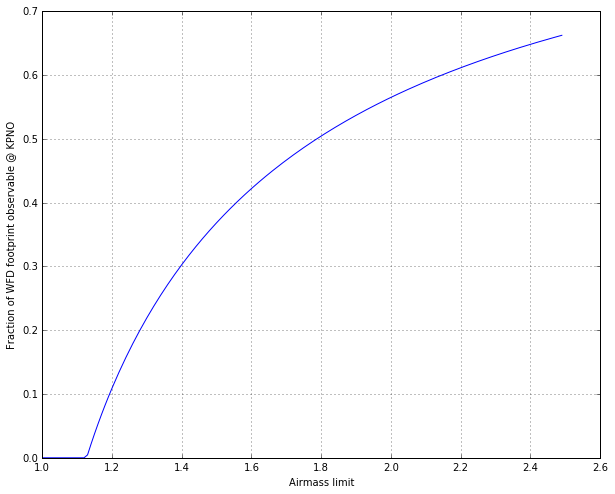

In [8]:
airmass_limits = np.arange(1, 2.5, 0.01)
overlap = np.zeros(len(airmass_limits))
for i, airmass in enumerate(airmass_limits):
    overlap[i] = overlap_wfd(kpno_lat, airmass, wfd_dec_min, wfd_dec_max)
plt.figure(figsize=[10, 8])
plt.plot(airmass_limits, overlap)
plt.xlabel('Airmass limit')
plt.ylabel('Fraction of WFD footprint observable @ KPNO')
plt.grid()

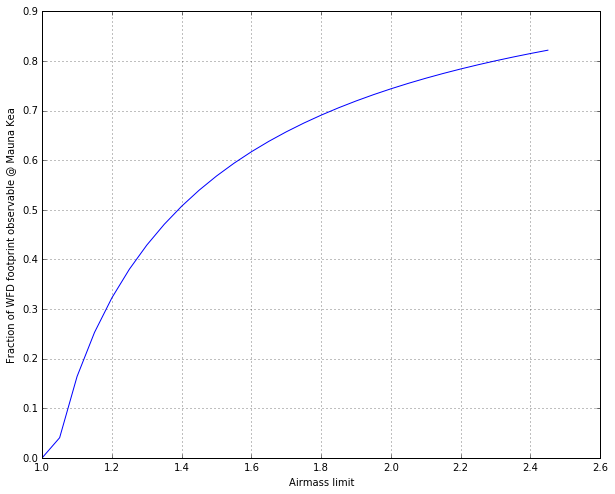

In [9]:
airmass_limits = np.arange(1, 2.5, 0.05)
overlap = np.zeros(len(airmass_limits))
for i, airmass in enumerate(airmass_limits):
    overlap[i] = overlap_wfd(mk_lat, airmass, wfd_dec_min, wfd_dec_max)
plt.figure(figsize=[10, 8])
plt.plot(airmass_limits, overlap)
plt.xlabel('Airmass limit')
plt.ylabel('Fraction of WFD footprint observable @ Mauna Kea')
plt.grid()